In [1]:
import sys
sys.path.append("../")

In [109]:
import pickle
import random
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import torch
from plotly.subplots import make_subplots

from simulator.simulator import Sim
from strategies.rl import (
    A2CNetwork,
    Policy,
    RLStrategy,
    A2C,
    ComputeValueTargets,
)
from utils.get_info import get_pnl, get_volumes
from utils.load_data import load_md_from_csv
from datetime import datetime, timezone, timedelta
from tqdm import tqdm


In [3]:
def preprocess_data(csv_books, csv_trades, num_rows=-1):
    return load_md_from_csv(csv_books, csv_trades, num_rows=num_rows)


In [5]:
dataset = preprocess_data(
    "../data/books.csv", "../data/trades.csv"
)

print("TOTAL DATA UPDATES: %d" % len(dataset))

TOTAL DATA UPDATES: 1797585


In [98]:
dataset[0]

MdUpdate(exchange_ts=1673222400.909, receive_ts=1673222400.909, orderbook=None, trade=AnonTrade(exchange_ts=1673222400.909, receive_ts=1673222400.909, side='BID', size=0.00011667, price=17127.5))

In [71]:
import matplotlib.pyplot as plt

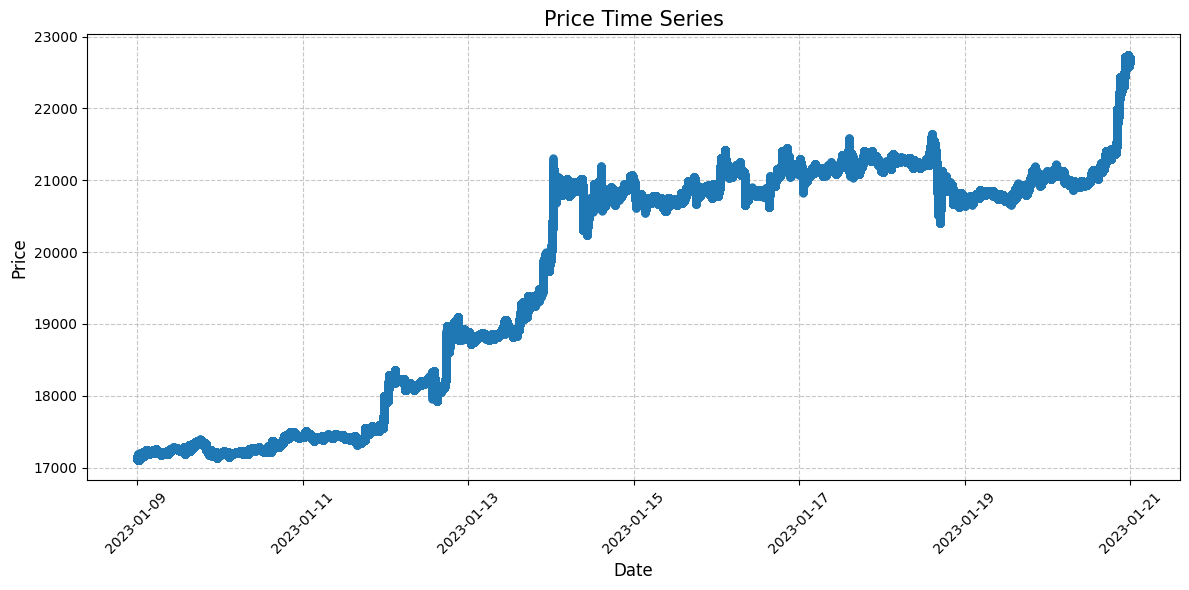

In [99]:
timestamps = [md.trade.exchange_ts for md in dataset if md.trade is not None]
prices = [md.trade.price for md in dataset if md.trade is not None]

# 将时间戳转换为可读的日期时间
dates = [datetime.utcfromtimestamp(ts) for ts in timestamps]

# 创建DataFrame以便更好地处理
df = pd.DataFrame({
    'Date': dates,
    'Price': prices
})

# 设置图形大小和样式
plt.figure(figsize=(12, 6))

# 绘制价格时间序列
plt.plot(df['Date'], df['Price'], marker='o', linestyle='-', linewidth=2, markersize=5)

# 设置标题和标签
plt.title('Price Time Series', fontsize=15)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price', fontsize=12)

# 旋转x轴标签以提高可读性
plt.xticks(rotation=45)

# 自动调整布局
plt.tight_layout()

# 显示网格线
plt.grid(True, linestyle='--', alpha=0.7)

# 显示图形
plt.show()

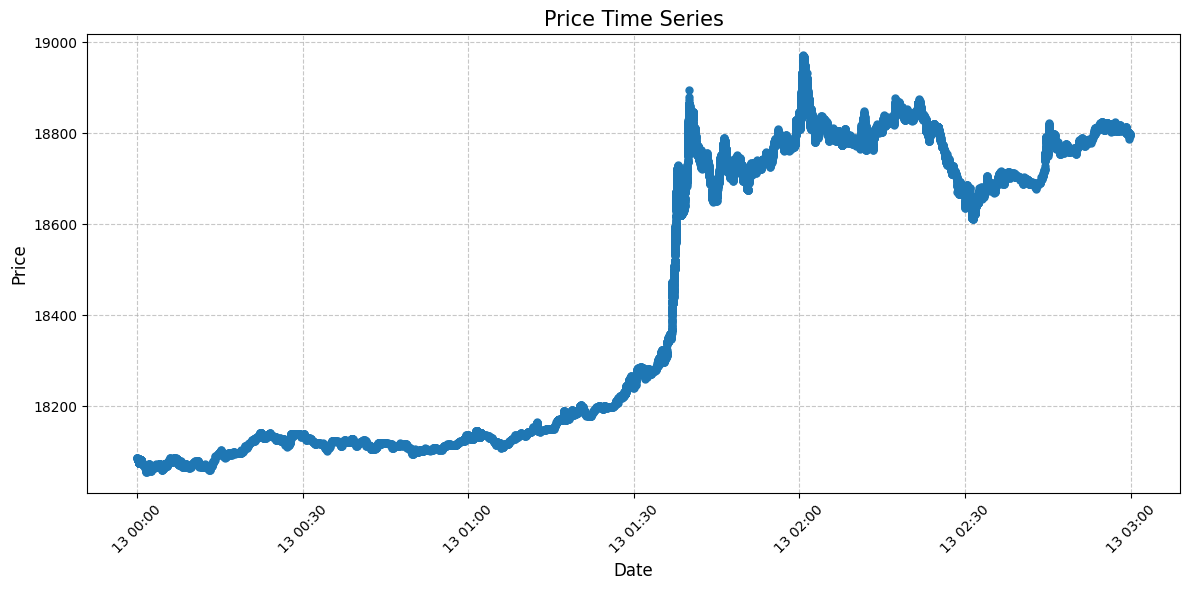

In [79]:
range = ["2023-01-13 00:00:00", "2023-01-13 03:00:00"]
timestamps = [md.trade.exchange_ts for md in dataset if md.trade and md.exchange_ts > datetime.strptime(range[0], "%Y-%m-%d %H:%M:%S").timestamp() and md.exchange_ts < datetime.strptime(range[1], "%Y-%m-%d %H:%M:%S").timestamp()]
prices = [md.trade.price for md in dataset if md.trade and md.exchange_ts > datetime.strptime(range[0], "%Y-%m-%d %H:%M:%S").timestamp() and md.exchange_ts < datetime.strptime(range[1], "%Y-%m-%d %H:%M:%S").timestamp()]

# 将时间戳转换为可读的日期时间
dates = [datetime.fromtimestamp(ts) for ts in timestamps]

# 创建DataFrame以便更好地处理
df = pd.DataFrame({
    'Date': dates,
    'Price': prices
})

# 设置图形大小和样式
plt.figure(figsize=(12, 6))

# 绘制价格时间序列
plt.plot(df['Date'], df['Price'], marker='o', linestyle='-', linewidth=2, markersize=5)

# 设置标题和标签
plt.title('Price Time Series', fontsize=15)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price', fontsize=12)

# 旋转x轴标签以提高可读性
plt.xticks(rotation=45)

# 自动调整布局
plt.tight_layout()

# 显示网格线
plt.grid(True, linestyle='--', alpha=0.7)

# 显示图形
plt.show()

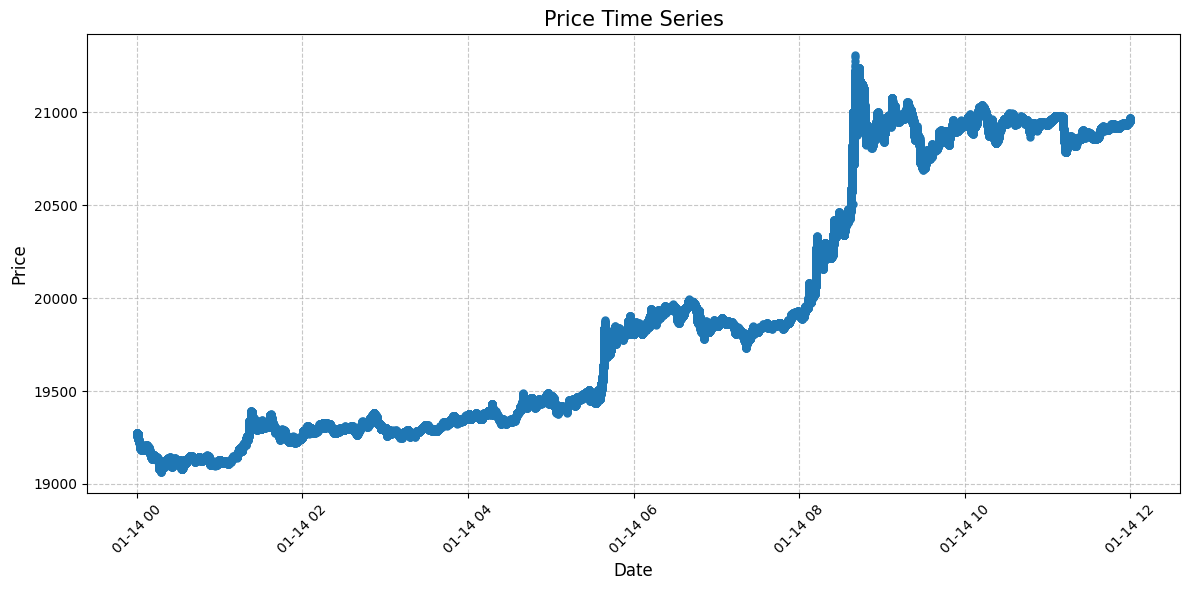

In [81]:
range = ["2023-01-14 00:00:00", "2023-01-14 12:00:00"]
timestamps = [md.trade.exchange_ts for md in dataset if md.trade and md.exchange_ts > datetime.strptime(range[0], "%Y-%m-%d %H:%M:%S").timestamp() and md.exchange_ts < datetime.strptime(range[1], "%Y-%m-%d %H:%M:%S").timestamp()]
prices = [md.trade.price for md in dataset if md.trade and md.exchange_ts > datetime.strptime(range[0], "%Y-%m-%d %H:%M:%S").timestamp() and md.exchange_ts < datetime.strptime(range[1], "%Y-%m-%d %H:%M:%S").timestamp()]

# 将时间戳转换为可读的日期时间
dates = [datetime.fromtimestamp(ts) for ts in timestamps]

# 创建DataFrame以便更好地处理
df = pd.DataFrame({
    'Date': dates,
    'Price': prices
})

# 设置图形大小和样式
plt.figure(figsize=(12, 6))

# 绘制价格时间序列
plt.plot(df['Date'], df['Price'], marker='o', linestyle='-', linewidth=2, markersize=5)

# 设置标题和标签
plt.title('Price Time Series', fontsize=15)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price', fontsize=12)

# 旋转x轴标签以提高可读性
plt.xticks(rotation=45)

# 自动调整布局
plt.tight_layout()

# 显示网格线
plt.grid(True, linestyle='--', alpha=0.7)

# 显示图形
plt.show()

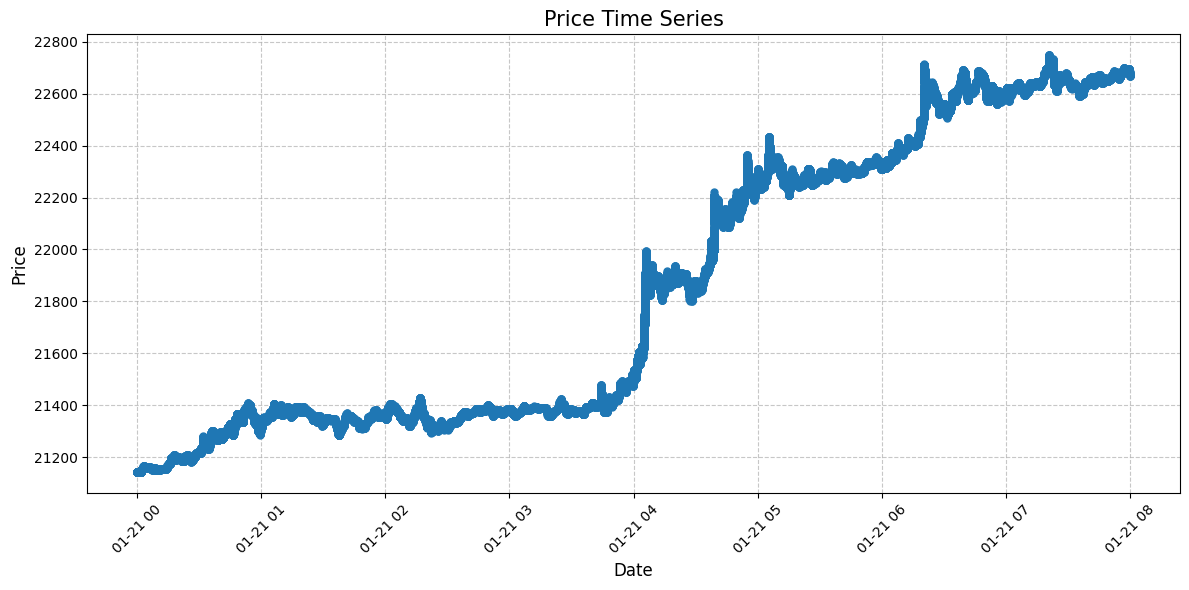

In [82]:
range = ["2023-01-21 00:00:00", "2023-01-22 12:00:00"]
timestamps = [md.trade.exchange_ts for md in dataset if md.trade and md.exchange_ts > datetime.strptime(range[0], "%Y-%m-%d %H:%M:%S").timestamp() and md.exchange_ts < datetime.strptime(range[1], "%Y-%m-%d %H:%M:%S").timestamp()]
prices = [md.trade.price for md in dataset if md.trade and md.exchange_ts > datetime.strptime(range[0], "%Y-%m-%d %H:%M:%S").timestamp() and md.exchange_ts < datetime.strptime(range[1], "%Y-%m-%d %H:%M:%S").timestamp()]

# 将时间戳转换为可读的日期时间
dates = [datetime.fromtimestamp(ts) for ts in timestamps]

# 创建DataFrame以便更好地处理
df = pd.DataFrame({
    'Date': dates,
    'Price': prices
})

# 设置图形大小和样式
plt.figure(figsize=(12, 6))

# 绘制价格时间序列
plt.plot(df['Date'], df['Price'], marker='o', linestyle='-', linewidth=2, markersize=5)

# 设置标题和标签
plt.title('Price Time Series', fontsize=15)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price', fontsize=12)

# 旋转x轴标签以提高可读性
plt.xticks(rotation=45)

# 自动调整布局
plt.tight_layout()

# 显示网格线
plt.grid(True, linestyle='--', alpha=0.7)

# 显示图形
plt.show()

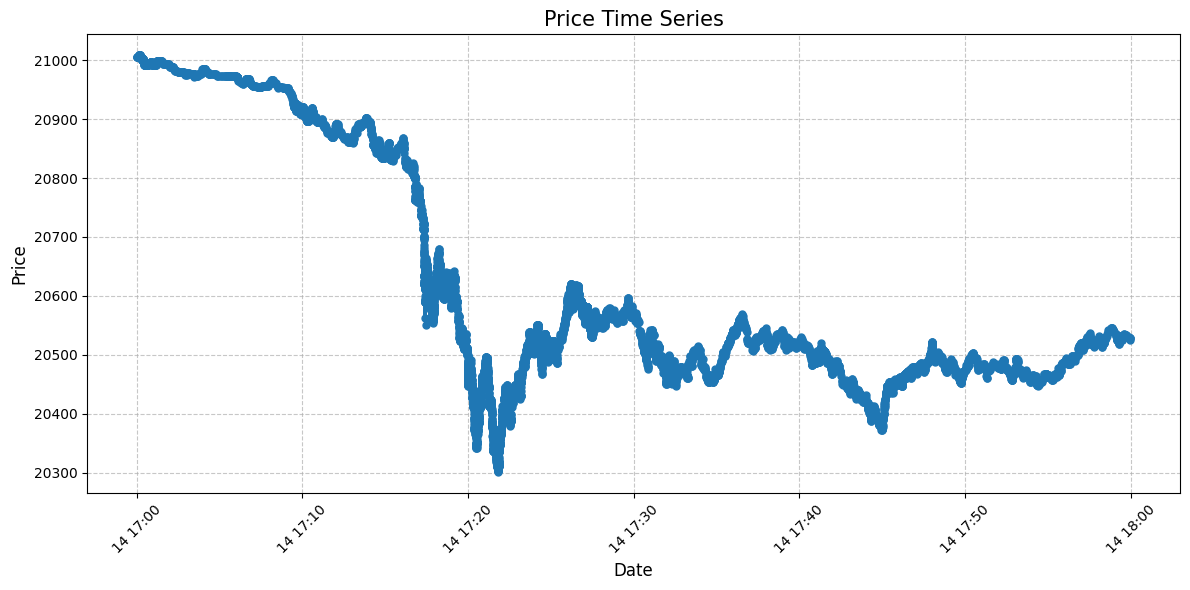

In [86]:
range = ["2023-01-14 17:00:00", "2023-01-14 18:00:00"]
timestamps = [md.trade.exchange_ts for md in dataset if md.trade and md.exchange_ts > datetime.strptime(range[0], "%Y-%m-%d %H:%M:%S").timestamp() and md.exchange_ts < datetime.strptime(range[1], "%Y-%m-%d %H:%M:%S").timestamp()]
prices = [md.trade.price for md in dataset if md.trade and md.exchange_ts > datetime.strptime(range[0], "%Y-%m-%d %H:%M:%S").timestamp() and md.exchange_ts < datetime.strptime(range[1], "%Y-%m-%d %H:%M:%S").timestamp()]

# 将时间戳转换为可读的日期时间
dates = [datetime.fromtimestamp(ts) for ts in timestamps]

# 创建DataFrame以便更好地处理
df = pd.DataFrame({
    'Date': dates,
    'Price': prices
})

# 设置图形大小和样式
plt.figure(figsize=(12, 6))

# 绘制价格时间序列
plt.plot(df['Date'], df['Price'], marker='o', linestyle='-', linewidth=2, markersize=5)

# 设置标题和标签
plt.title('Price Time Series', fontsize=15)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price', fontsize=12)

# 旋转x轴标签以提高可读性
plt.xticks(rotation=45)

# 自动调整布局
plt.tight_layout()

# 显示网格线
plt.grid(True, linestyle='--', alpha=0.7)

# 显示图形
plt.show()

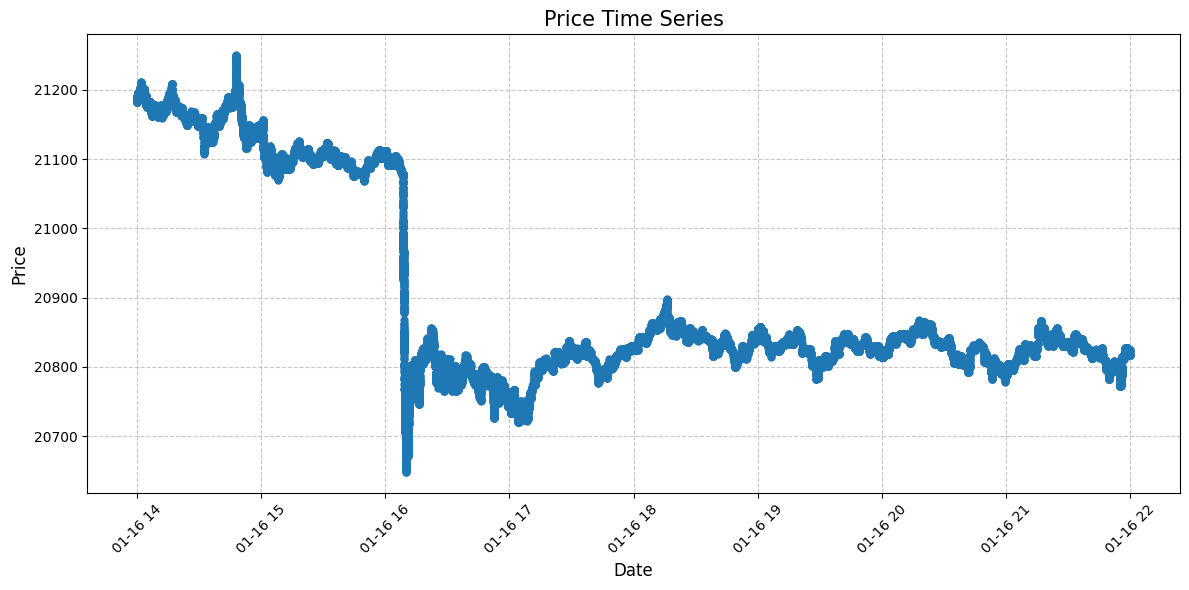

In [88]:
range = ["2023-01-16 14:00:00", "2023-01-16 22:00:00"]
timestamps = [md.trade.exchange_ts for md in dataset if md.trade and md.exchange_ts > datetime.strptime(range[0], "%Y-%m-%d %H:%M:%S").timestamp() and md.exchange_ts < datetime.strptime(range[1], "%Y-%m-%d %H:%M:%S").timestamp()]
prices = [md.trade.price for md in dataset if md.trade and md.exchange_ts > datetime.strptime(range[0], "%Y-%m-%d %H:%M:%S").timestamp() and md.exchange_ts < datetime.strptime(range[1], "%Y-%m-%d %H:%M:%S").timestamp()]

# 将时间戳转换为可读的日期时间
dates = [datetime.fromtimestamp(ts) for ts in timestamps]

# 创建DataFrame以便更好地处理
df = pd.DataFrame({
    'Date': dates,
    'Price': prices
})

# 设置图形大小和样式
plt.figure(figsize=(12, 6))

# 绘制价格时间序列
plt.plot(df['Date'], df['Price'], marker='o', linestyle='-', linewidth=2, markersize=5)

# 设置标题和标签
plt.title('Price Time Series', fontsize=15)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price', fontsize=12)

# 旋转x轴标签以提高可读性
plt.xticks(rotation=45)

# 自动调整布局
plt.tight_layout()

# 显示网格线
plt.grid(True, linestyle='--', alpha=0.7)

# 显示图形
plt.show()

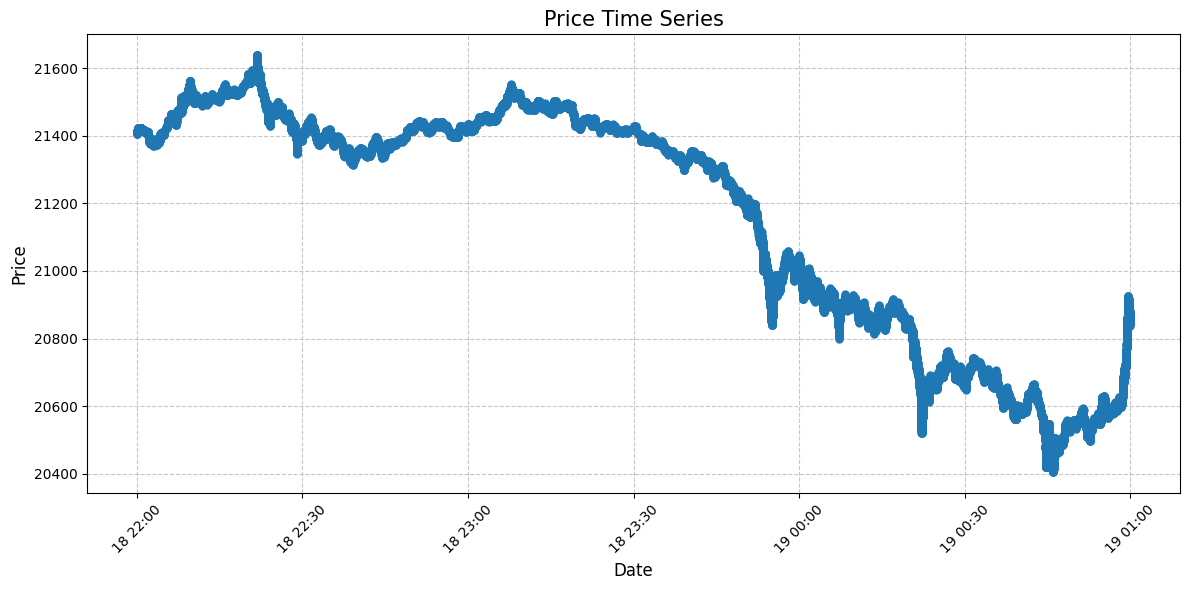

In [90]:
range = ["2023-01-18 22:00:00", "2023-01-19 01:00:00"]
timestamps = [md.trade.exchange_ts for md in dataset if md.trade and md.exchange_ts > datetime.strptime(range[0], "%Y-%m-%d %H:%M:%S").timestamp() and md.exchange_ts < datetime.strptime(range[1], "%Y-%m-%d %H:%M:%S").timestamp()]
prices = [md.trade.price for md in dataset if md.trade and md.exchange_ts > datetime.strptime(range[0], "%Y-%m-%d %H:%M:%S").timestamp() and md.exchange_ts < datetime.strptime(range[1], "%Y-%m-%d %H:%M:%S").timestamp()]

# 将时间戳转换为可读的日期时间
dates = [datetime.fromtimestamp(ts) for ts in timestamps]

# 创建DataFrame以便更好地处理
df = pd.DataFrame({
    'Date': dates,
    'Price': prices
})

# 设置图形大小和样式
plt.figure(figsize=(12, 6))

# 绘制价格时间序列
plt.plot(df['Date'], df['Price'], marker='o', linestyle='-', linewidth=2, markersize=5)

# 设置标题和标签
plt.title('Price Time Series', fontsize=15)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price', fontsize=12)

# 旋转x轴标签以提高可读性
plt.xticks(rotation=45)

# 自动调整布局
plt.tight_layout()

# 显示网格线
plt.grid(True, linestyle='--', alpha=0.7)

# 显示图形
plt.show()

In [123]:
def plot_aio(time_range, dataset):
    # 计算时间范围和前五小时的区间
    t1 = datetime.strptime(time_range[0], "%Y-%m-%d %H:%M:%S").replace(tzinfo=timezone.utc).timestamp()
    t2 = datetime.strptime(time_range[1], "%Y-%m-%d %H:%M:%S").replace(tzinfo=timezone.utc).timestamp()
    ta = (datetime.strptime(time_range[0], "%Y-%m-%d %H:%M:%S").replace(tzinfo=timezone.utc) - timedelta(hours=2)).timestamp()
    print(ta, t1, t2)
    
    timestamps = [md.trade.exchange_ts for md in dataset if md.trade is not None]
    prices = [md.trade.price for md in dataset if md.trade is not None]
    
    # 将时间戳转换为可读的日期时间
    dates = [datetime.utcfromtimestamp(ts) for ts in timestamps]
    
    # 创建DataFrame以便更好地处理
    df = pd.DataFrame({
        "receive_ts": timestamps,
        'Date': dates,
        'Price': prices
    })
    
    # 设置图形大小和样式
    plt.figure(figsize=(12, 6))
    
    
    
    # 根据时间范围和前五小时分别上色
    # 在time_range范围内的点为红色
    in_range_mask = (df['receive_ts'] >= t1) & (df['receive_ts'] <= t2)
    plt.scatter(df.loc[in_range_mask, 'Date'], 
                df.loc[in_range_mask, 'Price'], 
                color='red', marker='o', s=1)
    
    # 前五小时的点为黄色
    pre_five_hours_mask = (df['receive_ts'] >= ta) & (df['receive_ts'] < t1)
    plt.scatter(df.loc[pre_five_hours_mask, 'Date'], 
                df.loc[pre_five_hours_mask, 'Price'], 
                color='yellow', marker='o', s=1)
    
    # 其他点保持原来的颜色（蓝色）
    other_mask = ~(in_range_mask | pre_five_hours_mask)
    plt.scatter(df.loc[other_mask, 'Date'], 
                df.loc[other_mask, 'Price'], 
                color='blue', marker='o', s=5)
    
    # 连接所有点
    #plt.plot(df['Date'], df['Price'], color='gray', linestyle='-', linewidth=1)
    
    # 设置标题和标签
    plt.title('Price Time Series', fontsize=15)
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Price', fontsize=12)
    
    # 旋转x轴标签以提高可读性
    plt.xticks(rotation=45)
    
    # 自动调整布局
    plt.tight_layout()
    
    # 显示网格线
    plt.grid(True, linestyle='--', alpha=0.7)
    
    # 显示图形
    plt.show()

In [125]:
def plot_local(time_range, dataset):
    # 计算时间范围和前五小时的区间
    t1 = datetime.strptime(time_range[0], "%Y-%m-%d %H:%M:%S").replace(tzinfo=timezone.utc).timestamp()
    t2 = datetime.strptime(time_range[1], "%Y-%m-%d %H:%M:%S").replace(tzinfo=timezone.utc).timestamp()
    ta = (datetime.strptime(time_range[0], "%Y-%m-%d %H:%M:%S").replace(tzinfo=timezone.utc) - timedelta(hours=2)).timestamp()
    print(ta, t1, t2)
    
    timestamps = [md.trade.exchange_ts for md in dataset if md.trade is not None]
    prices = [md.trade.price for md in dataset if md.trade is not None]
    
    # 将时间戳转换为可读的日期时间
    dates = [datetime.utcfromtimestamp(ts) for ts in timestamps]
    
    # 创建DataFrame以便更好地处理
    df = pd.DataFrame({
        "receive_ts": timestamps,
        'Date': dates,
        'Price': prices
    })
    
    # 设置图形大小和样式
    plt.figure(figsize=(12, 6))
    
    
    
    # 根据时间范围和前五小时分别上色
    # 在time_range范围内的点为红色
    in_range_mask = (df['receive_ts'] >= t1) & (df['receive_ts'] <= t2)
    plt.scatter(df.loc[in_range_mask, 'Date'], 
                df.loc[in_range_mask, 'Price'], 
                color='red', marker='o', s=1)
    
    # 前五小时的点为黄色
    pre_five_hours_mask = (df['receive_ts'] >= ta) & (df['receive_ts'] < t1)
    plt.scatter(df.loc[pre_five_hours_mask, 'Date'], 
                df.loc[pre_five_hours_mask, 'Price'], 
                color='yellow', marker='o', s=1)
    
 
    # 设置标题和标签
    plt.title('Price Time Series', fontsize=15)
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Price', fontsize=12)
    
    # 旋转x轴标签以提高可读性
    plt.xticks(rotation=45)
    
    # 自动调整布局
    plt.tight_layout()
    
    # 显示网格线
    plt.grid(True, linestyle='--', alpha=0.7)
    
    # 显示图形
    plt.show()

1674093600.0 1674100800.0 1674129600.0


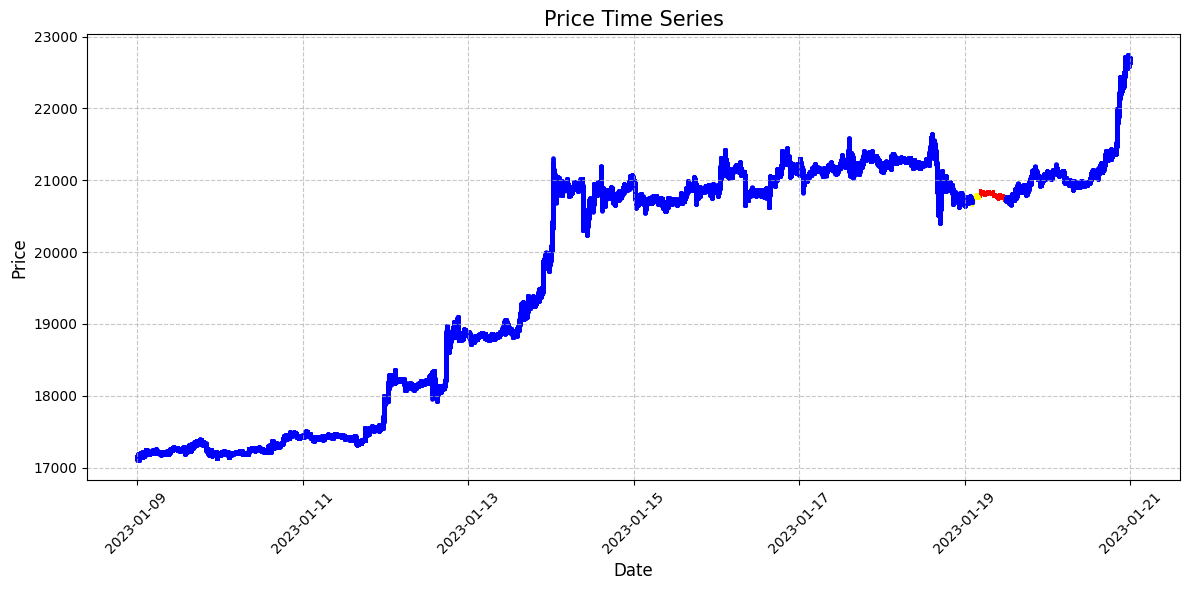

1674093600.0 1674100800.0 1674129600.0


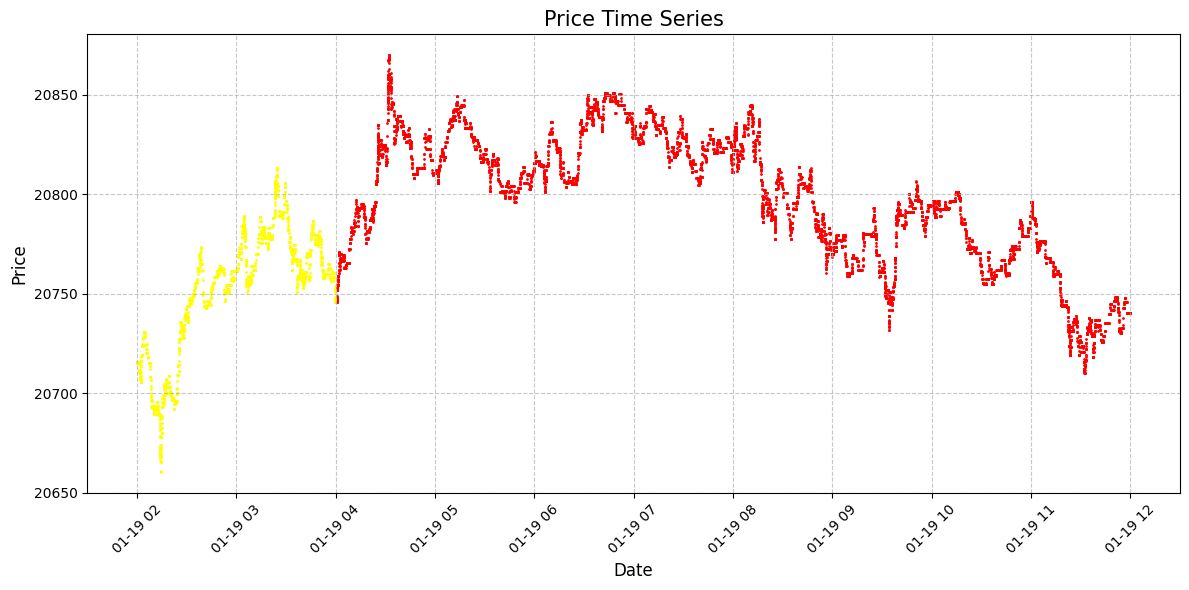

In [127]:
# 假设time_range是你想要的目标时间范围
time_range = ["2023-01-19 04:00:00", "2023-01-19 12:00:00"]
plot_aio(time_range, dataset)
plot_local(time_range, dataset)

1673751600.0 1673758800.0 1673762400.0


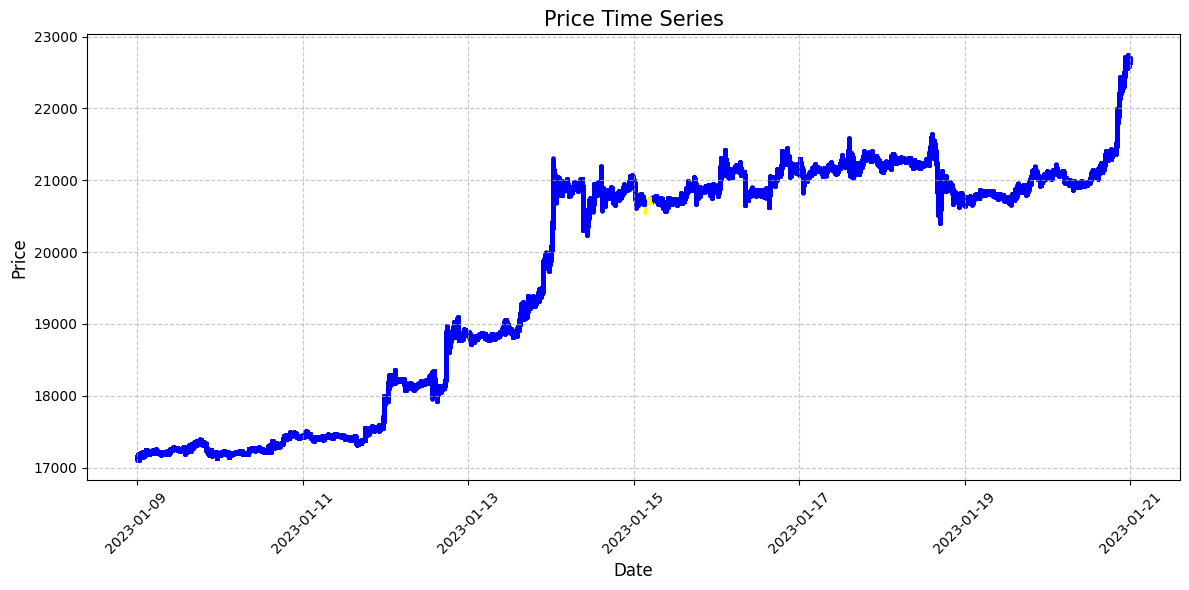

In [128]:
time_range = ["2023-01-15 05:00:00", "2023-01-15 06:00:00"]
plot_aio(time_range, dataset)

1673550000.0 1673568000.0 1673596800.0


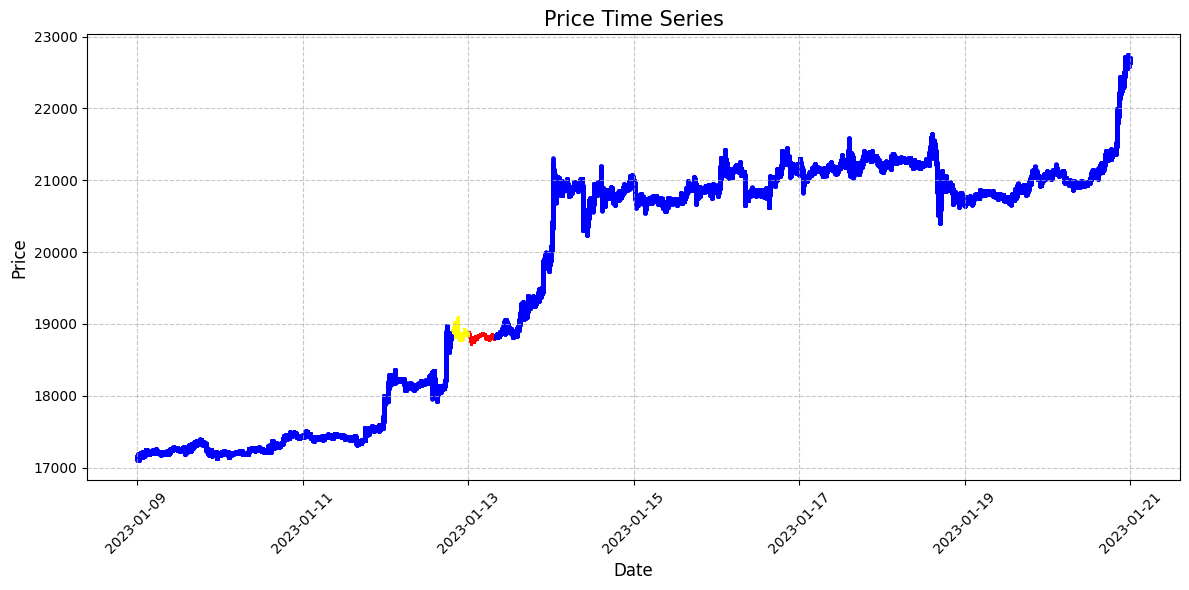

In [121]:
time_range = ["2023-01-13 00:00:00", "2023-01-13 08:00:00"]
plot_aio(time_range, dataset)

1674212400.0 1674230400.0 1674360000.0


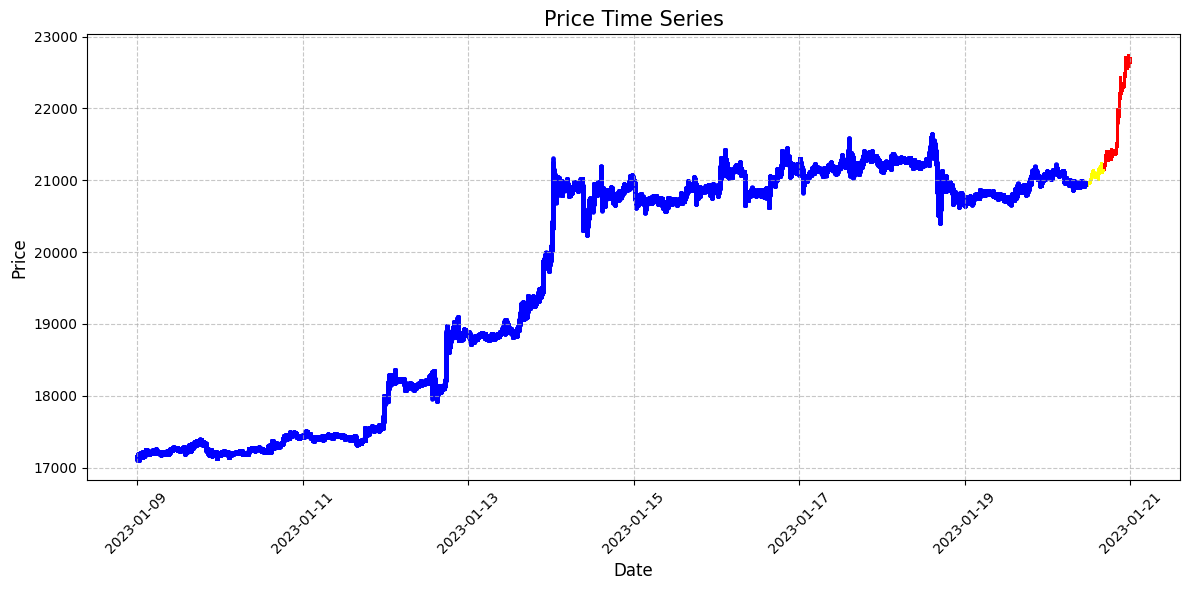

In [122]:
time_range = ["2023-01-20 16:00:00", "2023-01-22 04:00:00"]
plot_aio(time_range, dataset)